In [1]:
from os.path import join

from pandas import read_csv

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from sklearn.metrics import f1_score

In [2]:
data_dir = "/home/benoit/data/dreem_challenge/"
labels_path = "/home/benoit/data/dreem_challenge/y_train.csv"

labels = read_csv(labels_path)

In [3]:
from tools.processing import load_features, merge_features

features_1 = load_features(join(data_dir, "computed", 'base_1_train.csv'))
features_2 = load_features(join(data_dir, "computed", 'base_2_train.csv'))
features_3 = load_features(join(data_dir, "computed", 'base_3_train.csv'))

f_train = merge_features([features_1, features_2, features_3])
y = labels['sleep_stage']
f_train = f_train.drop(['abs_index'], axis=1)

In [4]:
f_train.shape

(24688, 57)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(f_train, y, test_size = 0.3)

# Features preprocessing (noramlization etc...)

# ...

# ...

#

In [9]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# slct = SelectKBest(f_classif, k=10)

# X_train = slct.fit_transform(X_train, y_train)
# X_test = slct.transform(X_test)


In [7]:
# Model initialization

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_leaf=0.001)

#clf = KNeighborsClassifier(n_neighbors = 15)
#clf= SVC(kernel = 'linear', C = 1)
#clf = GaussianNB()

In [8]:
# Hyperparameter tuning (k-fold etc...)

# ...

# ...

#

In [9]:
# Model training

clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.001)

In [14]:
# Model verifications

predictions_train = clf.predict(X_train)
print(f"Training score - {f1_score(predictions_train, y_train, average='weighted')}")

predictions_test = clf.predict(X_test)
print(f"Testing score - {f1_score(predictions_test, y_test, average='weighted')}")

Training score - 0.7922569457277733
Testing score - 0.7167796516975842


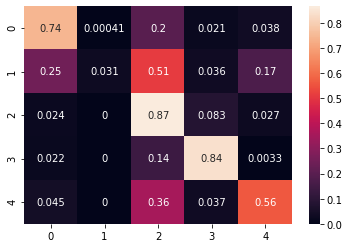

In [45]:
# Analyse des résultats 
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from matplotlib.pyplot import show

cm = confusion_matrix(y_train, predictions_train, normalize="true")
ax = heatmap(cm, annot=True)
show()

In [39]:
from collections import Counter

print(Counter(y_train))
print(Counter(predictions_train))

Counter({2: 6610, 3: 3668, 4: 3410, 0: 2446, 1: 1147})
Counter({2: 8507, 3: 3844, 0: 2496, 4: 2398, 1: 36})


In [11]:
# Loading evaluation data

f_1_e = load_features(join(data_dir, "computed", 'base_1_eval.csv'))
f_2_e = load_features(join(data_dir, "computed", 'base_2_eval.csv'))
f_3_e = load_features(join(data_dir, "computed", 'base_3_eval.csv'))

f_eval = merge_features([f_1_e, f_2_e, f_3_e])

f_eval = f_eval.drop(['abs_index'], axis=1)

# assert f_train.keys() == f_eval.keys()

# Features preprocessing & Feature selection (both must be applied as for training features)

# ...

# ...

#

In [12]:
# Making prediction on eval data

eval_pred = clf.predict(f_eval)

sub = read_csv(join(data_dir, 'sample_submission.csv'))
sub['sleep_stage'] = eval_pred

sub.to_csv("output/submission.csv", index=False)